In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

                                           age  annual_income  \
age                                   1.000000      -0.011997   
annual_income                        -0.011997       1.000000   
debt_to_income_ratio                 -0.012268       0.002833   
financial_knowledge_score            -0.014960       0.005424   
risk_appetite                        -0.023419       0.018632   
investment_horizon_years              0.000715      -0.009791   
dependents                            0.006096      -0.010179   
savings_rate                          0.000740      -0.007354   
net_worth                             0.002278       0.636050   
gender_Female                        -0.011021       0.007524   
gender_Male                           0.011688      -0.006223   
gender_Other                         -0.000649      -0.001311   
employment_status_Retired            -0.015197       0.001109   
employment_status_Salaried           -0.019001       0.016547   
employment_status_Self-Em

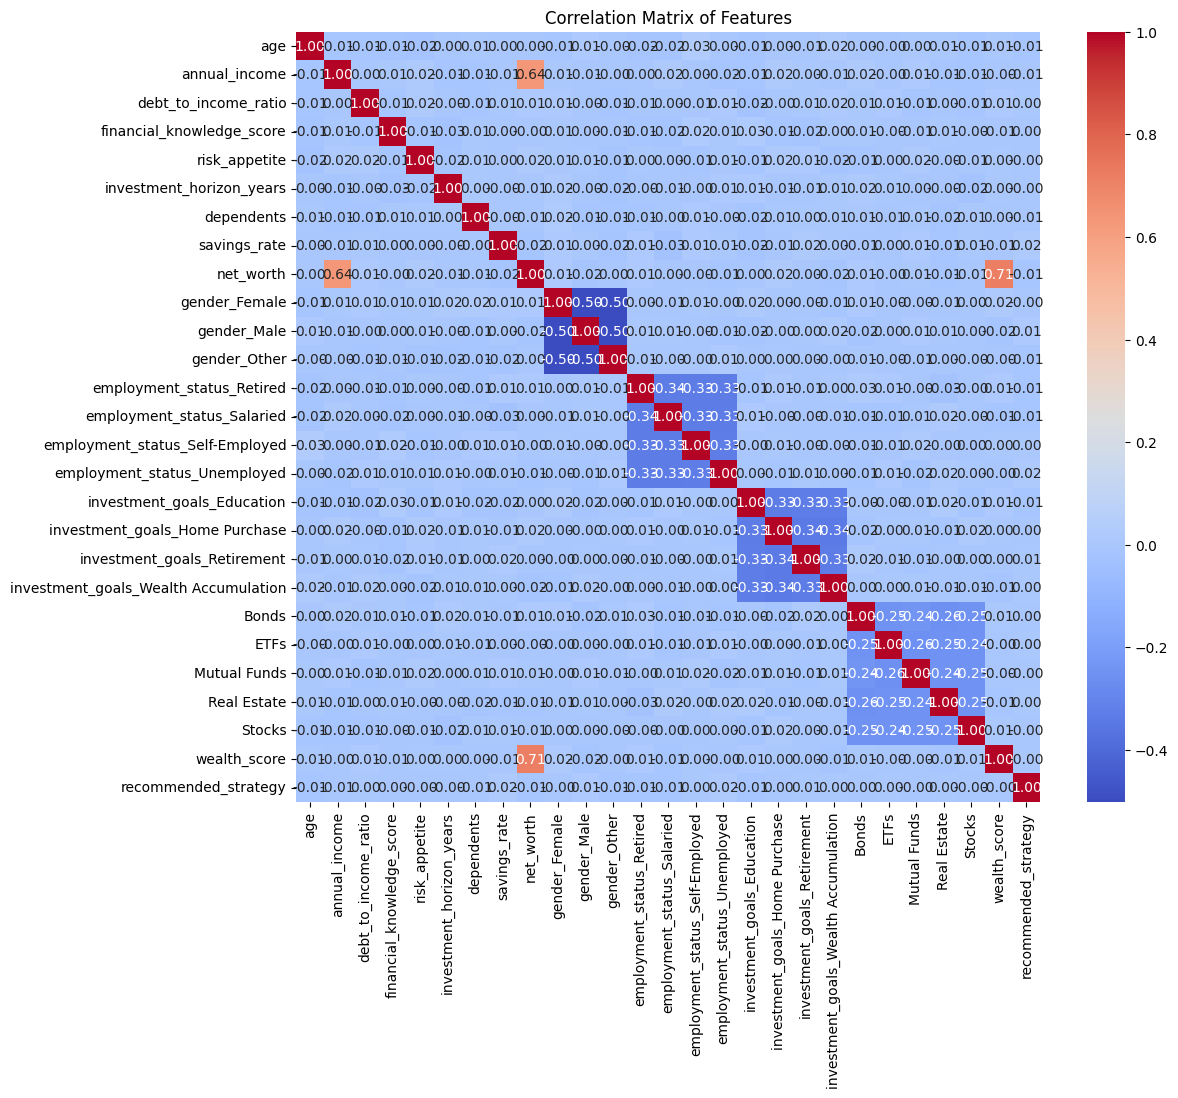

In [ ]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


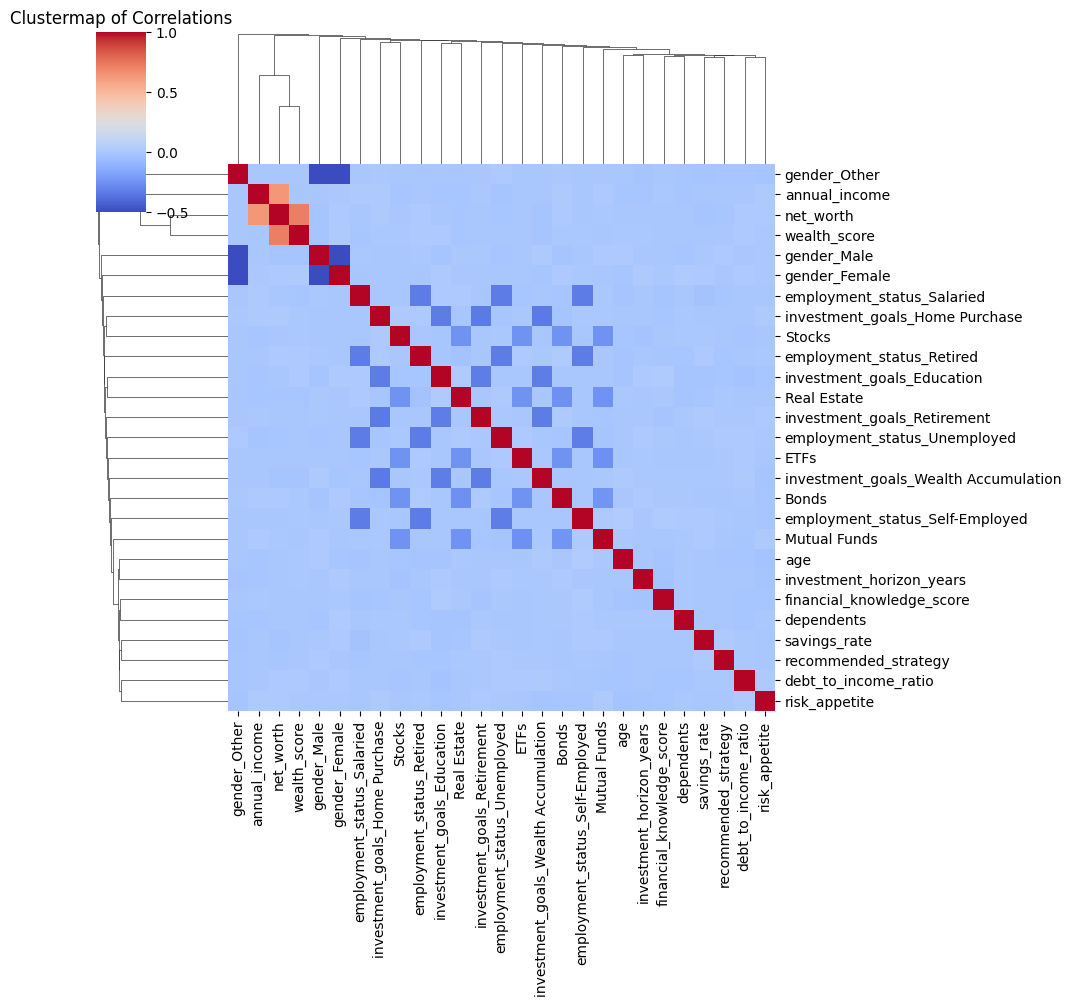

In [ ]:
sns.clustermap(correlation_matrix, cmap="coolwarm", figsize=(10, 10), annot=False)
plt.title("Clustermap of Correlations")
plt.show()

In [ ]:
# Calculate skewness for a specific column
skew_annual_income = df['annual_income'].skew()
print("Skewness of Annual Income:", skew_annual_income)

# Calculate skewness for all numeric features
skew_values = df.select_dtypes(include=['float64', 'int64']).skew()
print(skew_values)


Skewness of Annual Income: 0.0008459597326937135
age                                     0.006007
annual_income                           0.000846
debt_to_income_ratio                    0.009265
financial_knowledge_score               0.023970
risk_appetite                          -0.587062
investment_horizon_years                0.013613
dependents                              0.002722
savings_rate                           -0.007078
net_worth                               0.698254
gender_Female                           0.703080
gender_Male                             0.712630
gender_Other                            0.705940
employment_status_Retired               1.140772
employment_status_Salaried              1.151183
employment_status_Self-Employed         1.162902
employment_status_Unemployed            1.164760
investment_goals_Education              1.194178
investment_goals_Home Purchase          1.123776
investment_goals_Retirement             1.145662
investment_goals_Wea

In [ ]:
print(df.isnull().sum())

age                                      0
annual_income                            0
debt_to_income_ratio                     0
financial_knowledge_score                0
risk_appetite                            0
investment_horizon_years                 0
dependents                               0
savings_rate                             0
net_worth                               14
gender_Female                            0
gender_Male                              0
gender_Other                             0
employment_status_Retired                0
employment_status_Salaried               0
employment_status_Self-Employed          0
employment_status_Unemployed             0
investment_goals_Education               0
investment_goals_Home Purchase           0
investment_goals_Retirement              0
investment_goals_Wealth Accumulation     0
Bonds                                    0
ETFs                                     0
Mutual Funds                             0
Real Estate

In [ ]:
df_1 = pd.read_csv('/content/drive/My Drive/fluency/static_time_series.csv')

In [ ]:
df_1.columns

Index(['client_id', 'month', 'portfolio_value', 'equity_allocation_pct',
       'fixed_income_allocation_pct', 'monthly_contribution',
       'market_volatility_index', 'macroeconomic_score', 'sentiment_index',
       'age', 'annual_income', 'debt_to_income_ratio',
       'financial_knowledge_score', 'investment_horizon_years', 'dependents',
       'savings_rate', 'net_worth', 'risk_appetite_encoded', 'gender_Male',
       'gender_Other', 'employment_status_Salaried',
       'employment_status_Self-Employed', 'employment_status_Unemployed',
       'investment_goals_Home Purchase', 'investment_goals_Retirement',
       'investment_goals_Wealth Accumulation', 'asset_Bonds', 'asset_ETFs',
       'asset_Mutual Funds', 'asset_Real Estate', 'asset_Stocks',
       'forecasted_value_year_1', 'forecasted_value_year_2',
       'forecasted_value_year_3'],
      dtype='object')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_1

,client_id,month,portfolio_value,equity_allocation_pct,fixed_income_allocation_pct,monthly_contribution,market_volatility_index,macroeconomic_score,sentiment_index,age,...,investment_goals_Retirement,investment_goals_Wealth Accumulation,asset_Bonds,asset_ETFs,asset_Mutual Funds,asset_Real Estate,asset_Stocks,forecasted_value_year_1,forecasted_value_year_2,forecasted_value_year_3
0,96c4c0a3-bb3f-4ac1-81ad-0850cd29911f,2022-03-01,89775.68,56.07,43.93,1562.11,10.41,7.85,7.16,63,...,1.0,0.0,1,0,0,1,0,41357.803353,81489.888666,92882.024425
1,96c4c0a3-bb3f-4ac1-81ad-0850cd29911f,2022-04-01,89685.96,32.74,67.26,772.74,13.67,4.52,5.62,63,...,1.0,0.0,1,0,0,1,0,41357.803353,81489.888666,92882.024425
2,96c4c0a3-bb3f-4ac1-81ad-0850cd29911f,2022-05-01,90114.05,56.71,43.29,709.24,15.84,4.83,5.28,63,...,1.0,0.0,1,0,0,1,0,41357.803353,81489.888666,92882.024425
3,96c4c0a3-bb3f-4ac1-81ad-0850cd29911f,2022-06-01,90338.07,67.11,32.89,799.51,20.28,5.96,3.23,63,...,1.0,0.0,1,0,0,1,0,41357.803353,81489.888666,92882.024425
4,96c4c0a3-bb3f-4ac1-81ad-0850cd29911f,2022-07-01,92449.25,23.90,76.10,1923.33,29.31,7.04,4.52,63,...,1.0,0.0,1,0,0,1,0,41357.803353,81489.888666,92882.024425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359995,41b1bc9d-b7ec-4092-803b-6ae2a1023605,2024-10-01,56962.78,20.70,79.30,1862.76,20.85,3.09,5.88,64,...,0.0,0.0,0,1,0,1,0,32743.269398,98159.333223,144354.479482
359996,41b1bc9d-b7ec-4092-803b-6ae2a1023605,2024-11-01,59890.52,47.28,52.72,1926.25,22.79,4.85,4.91,64,...,0.0,0.0,0,1,0,1,0,32743.269398,98159.333223,144354.479482
359997,41b1bc9d-b7ec-4092-803b-6ae2a1023605,2024-12-01,60708.53,31.31,68.69,1958.70,15.64,5.05,3.71,64,...,0.0,0.0,0,1,0,1,0,32743.269398,98159.333223,144354.479482
359998,41b1bc9d-b7ec-4092-803b-6ae2a1023605,2025-01-01,61984.00,44.34,55.66,1284.70,26.19,3.81,5.71,64,...,0.0,0.0,0,1,0,1,0,32743.269398,98159.333223,144354.479482


In [ ]:
df_1.shape

(360000, 34)

In [ ]:
df_1.dtypes

,0
client_id,object
month,object
portfolio_value,float64
equity_allocation_pct,float64
fixed_income_allocation_pct,float64
monthly_contribution,float64
market_volatility_index,float64
macroeconomic_score,float64
sentiment_index,float64
age,int64


In [ ]:
df_1.describe(include="all")

,client_id,month,portfolio_value,equity_allocation_pct,fixed_income_allocation_pct,monthly_contribution,market_volatility_index,macroeconomic_score,sentiment_index,age,...,investment_goals_Retirement,investment_goals_Wealth Accumulation,asset_Bonds,asset_ETFs,asset_Mutual Funds,asset_Real Estate,asset_Stocks,forecasted_value_year_1,forecasted_value_year_2,forecasted_value_year_3
count,360000,360000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,...,360000.000000,360000.00000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000
unique,10000,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,65aa28ef-0efd-4d09-a023-70602ae33141,2022-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,36,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,78262.271567,49.965284,50.034716,1249.821294,19.990502,5.498096,5.500109,44.490700,...,0.251500,0.24970,0.399800,0.409800,0.387600,0.401900,0.400900,48938.246671,82317.239596,116204.381637
std,NaN,NaN,29202.474845,17.320700,17.320700,432.683542,5.778624,1.442192,1.443517,11.424066,...,0.433876,0.43284,0.489858,0.491797,0.487203,0.490283,0.490081,26245.145847,30041.882463,25961.730578
min,NaN,NaN,10074.630000,20.000000,20.000000,500.000000,10.000000,3.000000,3.000000,25.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,15012.655804,15450.515123,24685.851647
25%,NaN,NaN,55724.795000,34.970000,35.040000,875.220000,14.980000,4.250000,4.250000,35.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,27142.041255,59274.774835,99650.635448
50%,NaN,NaN,78252.610000,49.950000,50.050000,1249.420000,19.990000,5.500000,5.500000,44.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43012.246489,82326.897448,121756.321296
75%,NaN,NaN,100711.267500,64.960000,65.030000,1624.250000,25.000000,6.740000,6.750000,54.000000,...,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,65429.238283,105276.484850,137675.492206


In [ ]:
df_1.isnull().sum()

,0
client_id,0
month,0
portfolio_value,0
equity_allocation_pct,0
fixed_income_allocation_pct,0
monthly_contribution,0
market_volatility_index,0
macroeconomic_score,0
sentiment_index,0
age,0


In [ ]:
df_1.sort_values(by=["client_id", "month"],inplace=True)

In [ ]:

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

time_features = [
    'portfolio_value',
    'equity_allocation_pct',
    'fixed_income_allocation_pct',
    'monthly_contribution',
    'market_volatility_index',
    'macroeconomic_score',
    'sentiment_index'
]

# Initialize an empty list to store the results
all_results = []

# Check stationarity for each client and feature
for client_id in df_1['client_id'].unique():
    client_data = df_1[df_1['client_id'] == client_id]

    for feature in time_features:
        # Extract the time series for the current feature
        series = client_data[feature].values

        # Run ADF test
        result = adfuller(series, autolag='AIC')

        # Store results in the list
        all_results.append({
            'client_id': client_id,
            'feature': feature,
            'adf_statistic': result[0],
            'p_value': result[1],
            'is_stationary': result[1] < 0.05  # p-value < 0.05 → stationarity
        })

# Create the DataFrame after the loop
stationarity_results = pd.DataFrame(all_results)

# Save or display results
print(stationarity_results)

                                  client_id                      feature  \
0      000035c3-4d01-4ab0-9c6e-609d6c553cfd              portfolio_value   
1      000035c3-4d01-4ab0-9c6e-609d6c553cfd        equity_allocation_pct   
2      000035c3-4d01-4ab0-9c6e-609d6c553cfd  fixed_income_allocation_pct   
3      000035c3-4d01-4ab0-9c6e-609d6c553cfd         monthly_contribution   
4      000035c3-4d01-4ab0-9c6e-609d6c553cfd      market_volatility_index   
...                                     ...                          ...   
69995  fff0799a-f879-463c-8633-259936be608c  fixed_income_allocation_pct   
69996  fff0799a-f879-463c-8633-259936be608c         monthly_contribution   
69997  fff0799a-f879-463c-8633-259936be608c      market_volatility_index   
69998  fff0799a-f879-463c-8633-259936be608c          macroeconomic_score   
69999  fff0799a-f879-463c-8633-259936be608c              sentiment_index   

       adf_statistic       p_value  is_stationary  
0          -4.030284  1.259981e-03 

In [ ]:
# prompt: count the true false values of is stationary column

# Assuming 'stationarity_results' DataFrame from the previous code is available.

true_count = stationarity_results['is_stationary'].sum()
false_count = len(stationarity_results) - true_count

print(f"Number of True values in 'is_stationary' column: {true_count}")
print(f"Number of False values in 'is_stationary' column: {false_count}")


Number of True values in 'is_stationary' column: 53249
Number of False values in 'is_stationary' column: 16751


In [ ]:
stationarity_summary = (
    stationarity_results
    .groupby(['feature', 'is_stationary'])
    .size()
    .unstack(fill_value=0)
    .rename(columns={True: 'Stationary', False: 'Non-Stationary'})
)

print("\nStationarity Summary:")
print(stationarity_summary)


Stationarity Summary:
is_stationary                Non-Stationary  Stationary
feature                                                
equity_allocation_pct                  1135        8865
fixed_income_allocation_pct            1135        8865
macroeconomic_score                    1198        8802
market_volatility_index                1169        8831
monthly_contribution                   1156        8844
portfolio_value                        9758         242
sentiment_index                        1200        8800


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Define all features to check
time_features = [
    'portfolio_value',
    'equity_allocation_pct',
    'fixed_income_allocation_pct',
    'monthly_contribution',
    'market_volatility_index',
    'macroeconomic_score',
    'sentiment_index'
]

# Initialize list to store transformed DataFrames
transformed_data = []

for client_id in df_1['client_id'].unique():
    client_df = df_1[df_1['client_id'] == client_id].copy()

    for feature in time_features:
        series = client_df[feature].values

        # ADF test for stationarity
        p_value = adfuller(series, autolag='AIC')[1]

        if p_value >= 0.05:  # Non-stationary
            # Apply differencing (with padding to maintain length)
            diff_series = np.diff(series, n=1)
            diff_series = np.insert(diff_series, 0, 0)  # Pad with 0 at beginning

            # For percentage features (0-100 range), use % changes instead of raw diffs
            if feature in ['equity_allocation_pct', 'fixed_income_allocation_pct']:
                diff_series = np.diff(series) / series[:-1] * 100  # % change
                diff_series = np.insert(diff_series, 0, 0)

            client_df[f'{feature}_stationary'] = diff_series
        else:  # Stationary
            client_df[f'{feature}_stationary'] = series

    transformed_data.append(client_df)

# Combine all client data
df_stationary = pd.concat(transformed_data)

# Verify transformations
print("Transformed features:")
print(df_stationary.filter(like='_stationary').head())


Transformed features:
        portfolio_value_stationary  equity_allocation_pct_stationary  \
235152                    72632.22                             33.20   
235153                    74819.53                             20.49   
235154                    77785.39                             27.32   
235155                    79039.39                             27.73   
235156                    80111.75                             58.34   

        fixed_income_allocation_pct_stationary  \
235152                                   66.80   
235153                                   79.51   
235154                                   72.68   
235155                                   72.27   
235156                                   41.66   

        monthly_contribution_stationary  market_volatility_index_stationary  \
235152                          1850.01                               23.56   
235153                          1708.00                               20.09   
235154 

In [ ]:
df_stationary.describe()

,portfolio_value,equity_allocation_pct,fixed_income_allocation_pct,monthly_contribution,market_volatility_index,macroeconomic_score,sentiment_index,age,annual_income,debt_to_income_ratio,...,forecasted_value_year_1,forecasted_value_year_2,forecasted_value_year_3,portfolio_value_stationary,equity_allocation_pct_stationary,fixed_income_allocation_pct_stationary,monthly_contribution_stationary,market_volatility_index_stationary,macroeconomic_score_stationary,sentiment_index_stationary
count,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,...,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000
mean,78262.271567,49.965284,50.034716,1249.821294,19.990502,5.498096,5.500109,44.490700,74627.337031,0.348520,...,48938.246671,82317.239596,116204.381637,3174.241879,46.005587,46.029083,1105.147020,17.650412,4.839665,4.840488
std,29202.474845,17.320700,17.320700,432.683542,5.778624,1.442192,1.443517,11.424066,25014.516715,0.143997,...,26245.145847,30041.882463,25961.730578,13323.333782,29.064788,29.015497,605.707186,8.849615,2.344072,2.348349
min,10074.630000,20.000000,20.000000,500.000000,10.000000,3.000000,3.000000,25.000000,-15532.590000,0.100000,...,15012.655804,15450.515123,24685.851647,-1778.730000,-74.859005,-74.636227,-1491.050000,-19.800000,-4.990000,-4.970000
25%,55724.795000,34.970000,35.040000,875.220000,14.980000,4.250000,4.250000,35.000000,57777.872500,0.220000,...,27142.041255,59274.774835,99650.635448,753.457500,31.510000,31.530000,751.217500,13.150000,3.760000,3.760000
50%,78252.610000,49.950000,50.050000,1249.420000,19.990000,5.500000,5.500000,44.000000,74641.720000,0.350000,...,43012.246489,82326.897448,121756.321296,1246.570000,47.880000,47.980000,1156.040000,18.670000,5.160000,5.160000
75%,100711.267500,64.960000,65.030000,1624.250000,25.000000,6.740000,6.750000,54.000000,91628.275000,0.470000,...,65429.238283,105276.484850,137675.492206,1735.380000,64.460000,64.470000,1575.590000,24.320000,6.570000,6.580000
max,157448.870000,80.000000,80.000000,2000.000000,30.000000,8.000000,8.000000,64.000000,168770.150000,0.600000,...,144394.261266,149497.293512,149993.849937,150285.260000,293.392505,298.652022,2000.000000,30.000000,8.000000,8.000000


In [ ]:
static_df=df_stationary

In [ ]:
df_1 = df_1[df_1["annual_income"] >= 0].reset_index(drop=True)

In [ ]:
features_to_engineer = [
    'portfolio_value_stationary',
    'monthly_contribution_stationary',
    'market_volatility_index_stationary',
    'sentiment_index_stationary',
    'macroeconomic_score_stationary'
]

In [ ]:
# ---------- Function: Add Lag Features ----------
def add_lag_features(df, features, lags=[1, 3, 6]):
    df_lagged = df.copy()
    for feature in features:
        for lag in lags:
            df_lagged[f"{feature}_lag_{lag}"] = df_lagged.groupby("client_id")[feature].shift(lag)
    return df_lagged

# ---------- Function: Add Rolling Statistics ----------
def add_rolling_features(df, features, windows=[3, 6]):
    df_rolled = df.copy()
    for feature in features:
        for window in windows:
            df_rolled[f"{feature}_roll_mean_{window}"] = (
                df_rolled.groupby("client_id")[feature].transform(lambda x: x.rolling(window).mean())
            )
            df_rolled[f"{feature}_roll_std_{window}"] = (
                df_rolled.groupby("client_id")[feature].transform(lambda x: x.rolling(window).std())
            )
    return df_rolled

# ---------- Apply Lag + Rolling Feature Engineering ----------
df_1 = add_lag_features(df_stationary, features=features_to_engineer, lags=[1, 3, 6])
df_1 = add_rolling_features(df_stationary, features=features_to_engineer, windows=[3, 6])

# ---------- Drop rows with NaNs introduced by shifting/rolling ----------
df_1 = df_1.dropna().reset_index(drop=True)

In [ ]:
# prompt: drop client id and stored in df2

df2 = df.drop(columns=['client_id'])


In [ ]:
df2.columns

Index(['age', 'gender', 'employment_status', 'annual_income',
       'debt_to_income_ratio', 'financial_knowledge_score', 'investment_goals',
       'risk_appetite', 'investment_horizon_years', 'dependents',
       'preferred_asset_classes', 'savings_rate', 'net_worth',
       'recommended_strategy', 'age_category', 'age_group', 'income_category',
       'investment_horizon_category'],
      dtype='object')

In [ ]:
df2

,age,gender,employment_status,annual_income,debt_to_income_ratio,financial_knowledge_score,investment_goals,risk_appetite,investment_horizon_years,dependents,preferred_asset_classes,savings_rate,net_worth,recommended_strategy,age_category,age_group,income_category,investment_horizon_category
0,63,Other,Salaried,61244.14,0.49,5,Retirement,Medium,9,1,"['Bonds', 'Real Estate']",0.09,150946.53,2,56-65,Senior,Normal Income,Mid-term
1,43,Male,Salaried,111338.35,0.39,1,Home Purchase,Low,19,3,"['Stocks', 'Bonds']",0.29,1072347.37,2,36-45,Middle-Aged,High Income,Long-term
2,56,Other,Salaried,27581.32,0.12,5,Wealth Accumulation,Medium,13,3,"['Real Estate', 'ETFs']",0.07,177370.90,2,56-65,Senior,Low Income,Long-term
3,37,Other,Retired,64813.50,0.44,4,Retirement,Medium,3,2,"['Bonds', 'ETFs']",0.22,523811.23,1,36-45,Middle-Aged,Normal Income,Short-term
4,42,Male,Self-Employed,108668.65,0.35,2,Education,Low,19,0,"['ETFs', 'Stocks']",0.21,938672.67,1,36-45,Middle-Aged,High Income,Long-term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,38,Other,Self-Employed,67150.52,0.20,9,Retirement,High,12,0,"['Real Estate', 'ETFs']",0.06,258673.50,2,36-45,Middle-Aged,Normal Income,Long-term
9982,43,Male,Salaried,84165.44,0.48,7,Home Purchase,Low,13,1,"['Real Estate', 'Stocks']",0.07,218772.30,1,36-45,Middle-Aged,Normal Income,Long-term
9983,41,Male,Salaried,128000.39,0.25,4,Wealth Accumulation,High,24,3,"['Stocks', 'Bonds']",0.26,670513.62,1,36-45,Middle-Aged,High Income,Long-term
9984,34,Male,Salaried,118799.07,0.35,2,Home Purchase,Medium,4,1,"['Stocks', 'Bonds']",0.19,1174460.99,1,26-35,Young,High Income,Mid-term


In [ ]:
import pandas as pd
import numpy as np

time_features = [
    'portfolio_value', 'equity_allocation_pct',
    'fixed_income_allocation_pct', 'monthly_contribution',
    'market_volatility_index', 'macroeconomic_score',
    'sentiment_index'
]

# Pivot into sequences: shape = (n_clients, 36 months, n_time_features)
time_series_data = df_1.pivot(
    index='client_id',
    columns='month',
    values=time_features
)

# Convert to numpy array and reshape
n_clients = len(time_series_data)
n_timesteps = 36  # Fixed for all clients
n_features = len(time_features)

X_sequences = time_series_data.values.reshape(n_clients, n_timesteps, n_features)

# Extract targets (3 values per client)
y = df_1.groupby('client_id')[['forecasted_value_year_1', 'forecasted_value_year_2', 'forecasted_value_year_3']].first().values

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define model
model = Sequential([
    LSTM(64, input_shape=(36, len(time_features))),  # 64 LSTM units
    Dense(32, activation='relu'),
    Dense(3)  # Predict 3 values: year 1, 2, 3
])

model.compile(optimizer='adam', loss='mse')

# Train
model.fit(
    X_sequences,
    y,
    epochs=50,
    validation_split=0.2,
    batch_size=32
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 8185633280.0000 - val_loss: 8447068160.0000
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 8276405248.0000 - val_loss: 8393327616.0000
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 8151275008.0000 - val_loss: 8307936768.0000
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 8059417088.0000 - val_loss: 8194036736.0000
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 8020085248.0000 - val_loss: 8054959616.0000
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 7813373952.0000 - val_loss: 7893844480.0000
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 7693483520.0000 - val_loss: 7713458688.0000
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 7497506304.0000 - val_loss: 7516539392.0000
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 7325841408.0000 - val_loss: 7305253888.0000
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step -

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
# Get unique client IDs
client_ids = df_1['client_id'].unique()

# Split clients into train/test (20% test)
train_ids, test_ids = train_test_split(client_ids, test_size=0.2, random_state=42)

# ------------------------------------------
# 2. Build Sequences and Targets Correctly
# ------------------------------------------
# Group data by client_id and sort by month
client_groups = df_1.groupby('client_id')

# Initialize lists to store sequences and targets
X_sequences = []
y = []

# Iterate over clients in original order (to align with client_ids)
for client_id in client_ids:
    client_data = client_groups.get_group(client_id).sort_values('month')
    # Extract time-series features (shape: 36 months × 7 features)
    X_sequences.append(client_data[time_features].values)
    # Extract targets (first occurrence of forecasted values)
    y.append(client_data[['forecasted_value_year_1',
                         'forecasted_value_year_2',
                         'forecasted_value_year_3']].iloc[0].values)

# Convert to numpy arrays
X_sequences = np.array(X_sequences)  # Shape: (n_clients, 36, n_features)
y = np.array(y)  # Shape: (n_clients, 3)

# ------------------------------------------
# 3. Create Boolean Masks for Client IDs
# ------------------------------------------
# Create boolean masks aligned with client_ids
train_mask = np.isin(client_ids, train_ids)
test_mask = np.isin(client_ids, test_ids)

# Split data using masks
X_train, X_test = X_sequences[train_mask], X_sequences[test_mask]
y_train, y_test = y[train_mask], y[test_mask]

In [ ]:
X_train

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale time-series features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1]))
X_train_scaled = X_train_scaled.reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping



# Define the model
model = Sequential([
    # Input layer: 36 timesteps, 7 features (time_features)
    Input(shape=(36, 7)),  # Replace `time_features` with your feature count (e.g., 7)

    # First LSTM layer with dropout
    LSTM(
        units=128,                # Number of LSTM units (neurons)
        return_sequences=True,    # Return full sequence for next LSTM layer
        recurrent_dropout=0.2     # Dropout for recurrent connections (prevents overfitting)
    ),
    Dropout(0.3),                 # Dropout layer (regularization)

    # Second LSTM layer
    LSTM(
        units=64,                 # Fewer units for hierarchical feature learning
        return_sequences=False    # Only return last output (no further LSTM layers)
    ),

    # Dense layers for prediction
    Dense(64, activation='relu'), # Fully connected layer with ReLU activation
    Dropout(0.2),                 # Additional dropout
    Dense(3)                      # Output layer: 3 forecasted values (year 1, 2, 3)
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Lower learning rate for stability
    loss='mse',                           # Mean Squared Error (regression loss)
    metrics=['mae']                       # Track Mean Absolute Error during training
)

# Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',   # Watch validation loss
    patience=10,          # Stop after 10 epochs without improvement
    restore_best_weights=True  # Keep the best model weights
)


In [ ]:
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)


In [ ]:
history = model.fit(
    X_train_scaled,  # Scaled training sequences (shape: [n_clients, 36, 7])
    y_train_scaled,         # Targets (shape: [n_clients, 3])
    epochs=50,
    batch_size=32,
    validation_data=(X_test_scaled, y_test_scaled),  # Use test set for validation
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 108ms/step - loss: 236894880.0000 - mae: 15288.4307 - val_loss: 219080928.0000 - val_mae: 14793.1631
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 101ms/step - loss: 217209888.0000 - mae: 14639.2236 - val_loss: 197861872.0000 - val_mae: 14052.8643
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 107ms/step - loss: 194092352.0000 - mae: 13828.3799 - val_loss: 177784512.0000 - val_mae: 13313.9102
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - loss: 175688144.0000 - mae: 13152.0830 - val_loss: 158755984.0000 - val_mae: 12573.1738
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 113ms/step - loss: 156315296.0000 - mae: 12396.8652 - val_loss: 140979360.0000 - val_mae: 11839.2930
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 103ms/step - loss: 139076608.0000 - mae: 11683.0459 - val_loss: 124482432.0000 - val_mae: 11115.1670
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 121ms/step - loss: 121423912.0000 - mae: 10905.4883 - val_loss: 109434744.0000 - val_m

In [ ]:
model.save("/content/drive/My Drive/lstm_model.h5")

In [ ]:
y_pred_scaled = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step


In [ ]:
y_pred = scaler_y.inverse_transform(y_pred_scaled)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute metrics in original scale (USD)
mae = mean_absolute_error(y_test, y_pred)          # Compare with original y_test
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R²: {r2:.4f}")

MAE: $22,925.43
RMSE: $27,875.80
R²: 0.0003


In [ ]:
df = pd.read_csv('/content/drive/My Drive/fluency/engineered_stationary_data.csv')

In [ ]:
# Assign month numbers (1 to 36) for each client
df['month_numeric'] = df.groupby('client_id').cumcount() + 1

# Display the first few rows to verify
print(df[['client_id', 'month', 'month_numeric']].head(72))

                               client_id       month  month_numeric
0   96c4c0a3-bb3f-4ac1-81ad-0850cd29911f  2022-09-01              1
1   96c4c0a3-bb3f-4ac1-81ad-0850cd29911f  2022-10-01              2
2   96c4c0a3-bb3f-4ac1-81ad-0850cd29911f  2022-11-01              3
3   96c4c0a3-bb3f-4ac1-81ad-0850cd29911f  2022-12-01              4
4   96c4c0a3-bb3f-4ac1-81ad-0850cd29911f  2023-01-01              5
..                                   ...         ...            ...
67  e5aafbe0-c869-41d9-acf1-1b019363e449  2023-04-01              8
68  e5aafbe0-c869-41d9-acf1-1b019363e449  2023-05-01              9
69  e5aafbe0-c869-41d9-acf1-1b019363e449  2023-06-01             10
70  e5aafbe0-c869-41d9-acf1-1b019363e449  2023-07-01             11
71  e5aafbe0-c869-41d9-acf1-1b019363e449  2023-08-01             12

[72 rows x 3 columns]


In [ ]:
from sklearn.model_selection import train_test_split

# Define target variables
target_columns = ['forecasted_value_year_1', 'forecasted_value_year_2', 'forecasted_value_year_3']

# Define feature set (excluding client_id, month, and target variables)
feature_columns = [col for col in df.columns if col not in ['client_id', 'month','month_numeric'] + target_columns]

# Train-test split (keeping time order)
train_df = df[df['month_numeric'] <= 24]  # First 30 months for training
test_df = df[df['month_numeric'] >24]  # Last 6 months for testing

# Extract features (X) and targets (y)
X_train, y_train = train_df[feature_columns], train_df[target_columns]
X_test, y_test = test_df[feature_columns], test_df[target_columns]

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape X_train for LSTM input
# Assuming timesteps = 1 (since you haven't defined a specific timestep)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])

# Define LSTM model
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.2),
    LSTM(32, activation='relu', return_sequences=False),
    Dense(16, activation='relu'),
    Dense(y_train.shape[1])  # Output layer with 3 neurons for forecasted values
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
# Reshape X_train for LSTM input
# Assuming timesteps = 1 (since you haven't defined a specific timestep)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# ... (rest of the model definition code) ...

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
# Use the reshaped data for training
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 48s 6ms/step - loss: 1631028864.0000 - val_loss: 1044238080.0000
Epoch 2/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - loss: 954479488.0000 - val_loss: 1057437312.0000
Epoch 3/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 897785600.0000 - val_loss: 1114659456.0000
Epoch 4/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - loss: 875218176.0000 - val_loss: 1059548800.0000
Epoch 5/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 46s 6ms/step - loss: 859353024.0000 - val_loss: 1085995520.0000
Epoch 6/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - loss: 847743360.0000 - val_loss: 1014087872.0000
Epoch 7/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - loss: 842913472.0000 - val_loss: 1073494976.0000
Epoch 8/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 832325312.0000 - val_loss: 998563648.0000
Epoch 9/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 49s 6ms/step - loss: 834547840.0000 - val_loss: 987571776.0000
Epoch 10/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 44s 

In [ ]:
y_pred = model.predict(X_test_reshaped)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step


In [ ]:
# prompt: generate error r2 etc values

import numpy as np
# Compute metrics in original scale (USD)
mae = mean_absolute_error(y_test, y_pred)          # Compare with original y_test
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R²: {r2:.4f}")


MAE: $27,748.17
RMSE: $34,008.68
R²: -0.5477


TIME DELAY NEURAL NETWORK

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Reshape data to fit Conv1D input format: (samples, time steps, features)
# The kernel_size should be less than or equal to the timesteps
X_train_reshaped = np.expand_dims(X_train.values, axis=1)  # (samples, 1, features)
X_test_reshaped = np.expand_dims(X_test.values, axis=1)

# Define TDNN model
#Change the kernel size here
model = Sequential([
    Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1, X_train.shape[1])),
    Dropout(0.2),
    Conv1D(filters=32, kernel_size=1, activation='relu'),
    Dropout(0.2),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(y_train.shape[1])  # Output layer for multi-step forecasting
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Train model
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

# Predict
y_pred = model.predict(X_test_reshaped)


Epoch 1/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - loss: 1360049536.0000 - val_loss: 1356673536.0000
Epoch 2/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 914633152.0000 - val_loss: 1405645952.0000
Epoch 3/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - loss: 879282240.0000 - val_loss: 1554880000.0000
Epoch 4/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - loss: 859844288.0000 - val_loss: 1755267200.0000
Epoch 5/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - loss: 853838720.0000 - val_loss: 1496411264.0000
Epoch 6/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 843769408.0000 - val_loss: 1674129152.0000
Epoch 7/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 841558720.0000 - val_loss: 1509575552.0000
Epoch 8/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 840355648.0000 - val_loss: 1728207616.0000
Epoch 9/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 833389888.0000 - val_loss: 1442247168.0000
Epoch 10/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 27

In [ ]:

import numpy as np
# Compute metrics in original scale (USD)
mae = mean_absolute_error(y_test, y_pred)          # Compare with original y_test
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R²: {r2:.4f}")

MAE: $33,566.61
RMSE: $41,164.65
R²: -1.2828


In [ ]:
df